<a href="https://colab.research.google.com/github/Aitor1411/AR-PCB/blob/main/src/05_DIY_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_tutorial'

if not os.path.isdir(project_path):

  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

indicator_file_path = "data/indicators.csv"

if not os.path.isfile(indicator_file_path):
  print('Indicator dataset not found, extracting indicators...')
  !python src/00_Environment_Checks.py
  !python src/01_Indicator_extraction.py
  print('Indicators extracted succesfully!')

# Now Is Your Time...

With everything we've covered in these two sessions, it's now your time to demonstrate what you've learned.

What I need you to do is build a model, from feature extraction (which I've already completed for you) to model validation.

You can either complete the Remaining Useful Life (RUL) exercise that we did in our last session, or you could create a new exercise by manipulating the indicators. This could be to create an anomaly detection, a clustering problem, or a diagnostic model.

**The choice is yours**


# Evaluation

The following list of checkmarks will be used to evaluate the work, note some are optinoal while others are **compulsory**.

The following checks are a must:

- [ ] From a fresh restart, the notebook compiles correclty
- [ ] Use a validation partitioning schema
- [ ] Train a model
- [ ] Validate the model

The following checks will improve your marks and your understanding:

- [ ] Built a new problem dataset (anomaly, diagnosis, clustering)
- [ ] Checked the existence of missing values in the dataset / Eliminated outliers
- [ ] New exploratory visualization has been created
- [ ] Improved validation schemas have been used
- [ ] Feature engineering techniques are used
- [ ] New modelling algorithms are employed
- [ ] Deployment: A function that, given a file path reads, extracts indicators, runs model and returns a label.

Good luck and don't hesitate to ask any questions you might have during the development.

**From a fresh restart, the notebook compiles correclty**

In [2]:
import pandas as pd
indicators = pd.read_csv('data/indicators.csv', sep = '\t')
indicators.head()

,Origin,Bearing,OperatingCondition,TestNumber,TestIdx,Hour,Minute,Second,Mili/centisecond,Mean,...,BPFO_rms,BPFI_max,BPFI_rms,BSF_max,BSF_rms,Timestamp,Duration,Actual_RUL,RUL,Alive
0,Full_Test_Set,Bearing2_4,2,4,1,8,3,36,462540.0,0.006552,...,3.462482,2.702957,2.455653,15.180564,13.488451,2000-01-01 08:03:36,0.0,1390,1390.0,True
1,Full_Test_Set,Bearing2_4,2,4,2,8,3,46,462540.0,0.001299,...,5.925823,5.629765,4.592479,18.305801,13.007734,2000-01-01 08:03:46,10.0,1390,1380.0,True
2,Full_Test_Set,Bearing2_4,2,4,3,8,3,56,462540.0,0.003271,...,3.938765,6.103561,4.583218,9.434037,8.430699,2000-01-01 08:03:56,20.0,1390,1370.0,True
3,Full_Test_Set,Bearing2_4,2,4,4,8,4,6,462540.0,0.003263,...,2.652722,6.837217,6.077246,13.578691,10.908141,2000-01-01 08:04:06,30.0,1390,1360.0,True
4,Full_Test_Set,Bearing2_4,2,4,5,8,4,16,462540.0,0.004246,...,3.710252,8.133538,6.903766,12.933754,9.514291,2000-01-01 08:04:16,40.0,1390,1350.0,True


**Use a validation partitioning schema**

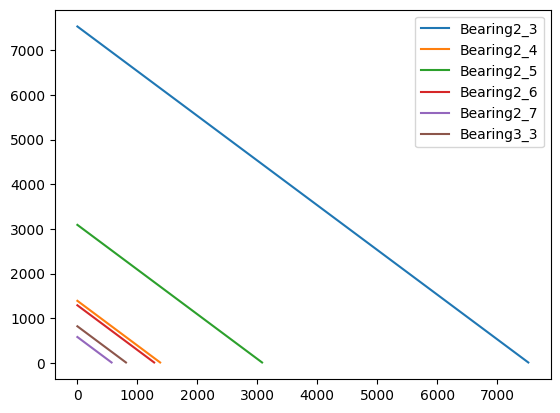

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

indicators = indicators[indicators.Alive == True].copy()

groups = indicators.groupby('Bearing')

for name, group in groups:
    plt.plot(group['Duration'],group['RUL'], label=name)

plt.legend()
plt.show()

In [4]:
indicators.columns


Index(['Origin', 'Bearing', 'OperatingCondition', 'TestNumber', 'TestIdx',
       'Hour', 'Minute', 'Second', 'Mili/centisecond', 'Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms', 'Timestamp', 'Duration', 'Actual_RUL', 'RUL',
       'Alive'],
      dtype='object')

In [5]:
import numpy as np

from sklearn.model_selection import train_test_split

actual_indicators = ['Mean',
       'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness',
       'Kurtosis', 'Crest Factor', 'Form Factor', 'Impulse Factor',
       'Margin Factor', 'Total Energy', 'Max Power Frequency',
       'Spectral Centroid', 'Spectral Bandwidth', 'Spectral Flatness',
       'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms',
       'BSF_max', 'BSF_rms']

target_variable = ['RUL']

In [6]:
# prompt: Select the variables to be used in the partitioning

X = indicators[actual_indicators]
X.head()


,Mean,Standard Deviation,RMS,Peak,Peak-to-Peak,Skewness,Kurtosis,Crest Factor,Form Factor,Impulse Factor,...,Spectral Centroid,Spectral Bandwidth,Spectral Flatness,Spectral Roll-off,BPFO_max,BPFO_rms,BPFI_max,BPFI_rms,BSF_max,BSF_rms
0,0.006552,0.341202,0.341264,1.142,2.272,0.051280,0.033186,3.346378,1.260168,4.217001,...,3264.183946,1913.956710,-7.961653,4520.0,4.478474,3.462482,2.702957,2.455653,15.180564,13.488451
1,0.001299,0.318229,0.318232,1.098,2.178,0.075415,0.015628,3.450318,1.250507,4.314646,...,3435.415092,2069.869338,-7.217908,5160.0,6.817578,5.925823,5.629765,4.592479,18.305801,13.007734
2,0.003271,0.326795,0.326811,1.247,2.333,0.062380,0.208370,3.815656,1.266538,4.832675,...,3187.168391,2064.430632,-7.633558,4790.0,4.653304,3.938765,6.103561,4.583218,9.434037,8.430699
3,0.003263,0.347232,0.347247,1.147,2.179,0.002695,-0.177687,3.303124,1.237778,4.088534,...,3586.623873,2018.803340,-7.532386,5260.0,3.219246,2.652722,6.837217,6.077246,13.578691,10.908141
4,0.004246,0.351220,0.351245,1.572,2.860,-0.021161,0.318689,4.475503,1.268576,5.677516,...,3380.191128,1928.736549,-8.284707,4760.0,3.806821,3.710252,8.133538,6.903766,12.933754,9.514291


In [7]:
# Select the indicators for the training, select target variable
Y = indicators[target_variable]
Y.head()

,RUL
0,1390.0
1,1380.0
2,1370.0
3,1360.0
4,1350.0


In [8]:
# Create a train test partitioning
X_train, X_test, y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# prompt: # Import the model
# # Fit the model
# # check the score

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Check the score of the model on the test data
score = model.score(X_test, Y_test)
print(f"Model R^2 score on the test set: {score}")

Model R^2 score on the test set: 0.39298600597997146


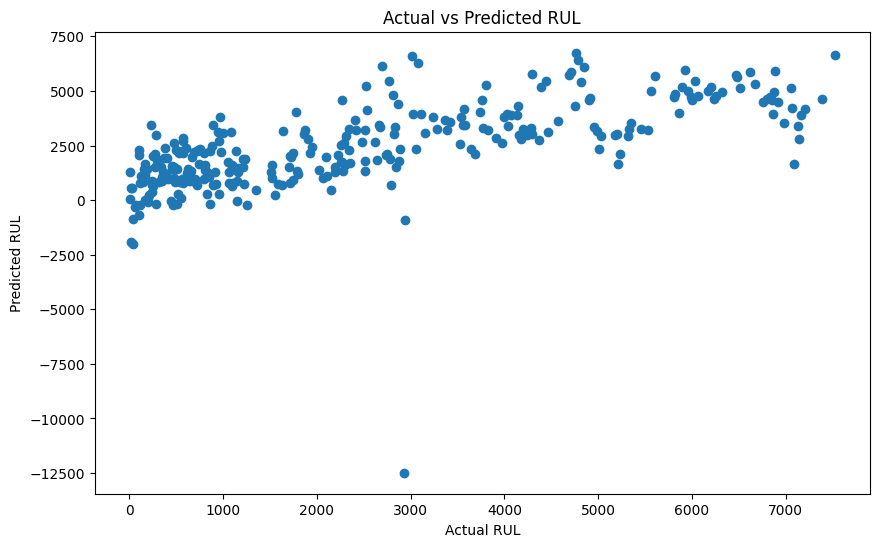

In [10]:
# prompt: plotear el verdadero contra predicho

import matplotlib.pyplot as plt

# Assuming 'model' and 'X_test', 'Y_test' are defined from the previous code
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Actual vs Predicted RUL")
#plt.plot([min(Y_test.min(),y_pred.min()), max(Y_test.max(),y_pred.max())], [min(Y_test.min(),y_pred.min()), max(Y_test.max(),y_pred.max())], color='red') # Add a diagonal line
plt.show()

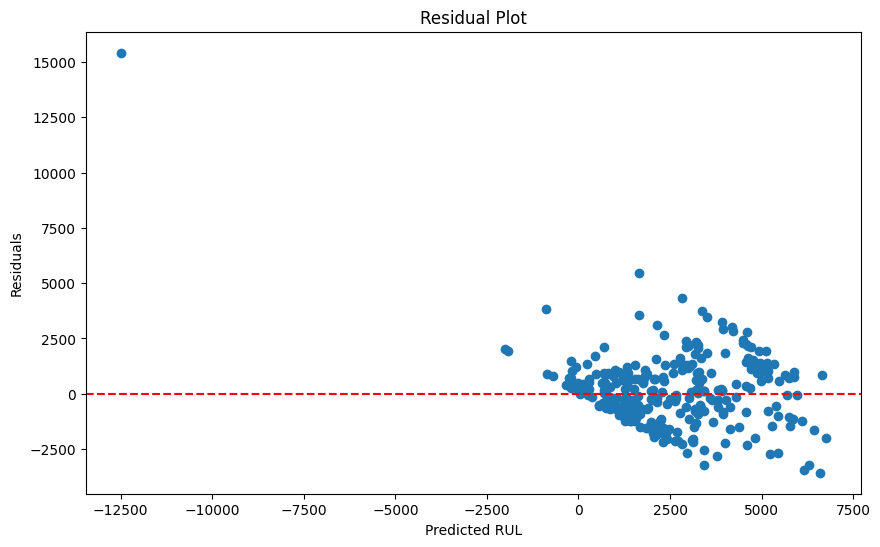

Mean Absolute Error (MAE): 1163.3835123556132
Mean Squared Error (MSE): 2817280.2797472086
Root Mean Squared Error (RMSE): 1678.4755821122953


In [11]:
# prompt: hacer regresión lineal

import matplotlib.pyplot as plt
import numpy as np
# Calculate the residuals
residuals = Y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted RUL")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Further analysis (optional):
# You could also calculate and print metrics like Mean Absolute Error (MAE),
# Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to further evaluate
# the model's performance.

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Checked the existence of missing values in the dataset

In [12]:
# prompt: Checked the existence of missing values in the dataset

# Check for missing values in the dataset
missing_values = indicators.isnull().sum()
missing_values

# If there are missing values, you can choose to handle them:
# 1. Remove rows with missing values:
# indicators = indicators.dropna()

# 2. Impute missing values (e.g., with the mean or median):
# for column in indicators.columns:
#     if indicators[column].isnull().any():
#         indicators[column] = indicators[column].fillna(indicators[column].mean()) # or .median()


,0
Origin,0
Bearing,0
OperatingCondition,0
TestNumber,0
TestIdx,0
Hour,0
Minute,0
Second,0
Mili/centisecond,0
Mean,0


**Graficar en una matriz**

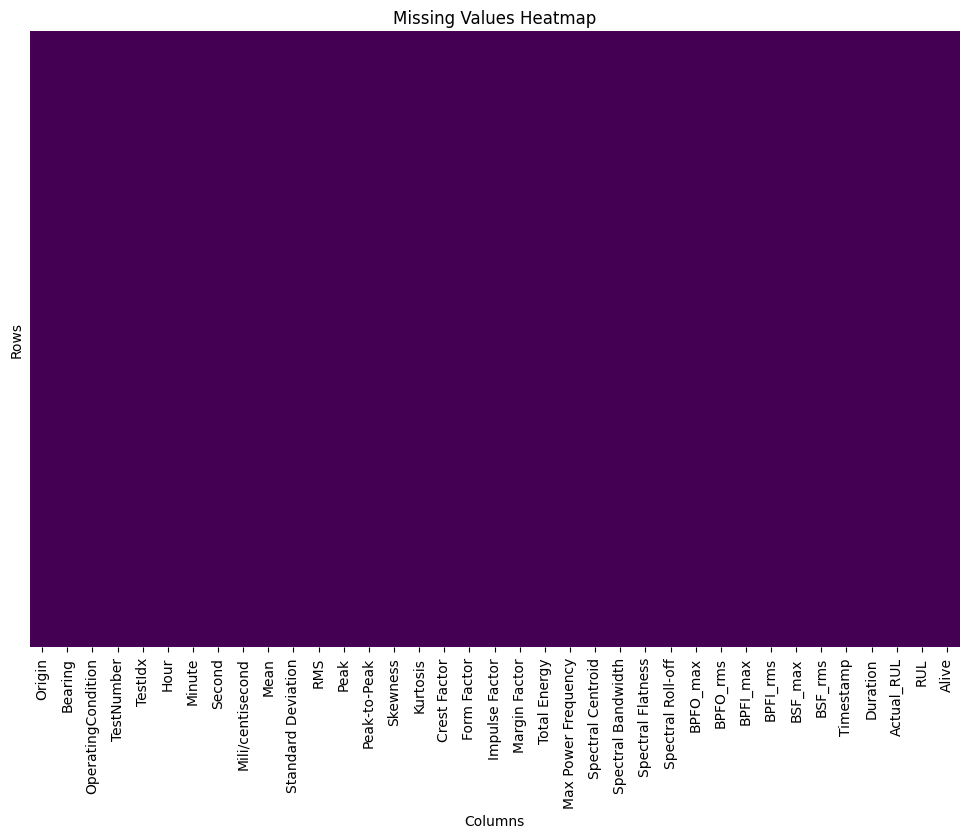

In [13]:
# prompt: graficar missing values en una matriz

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(indicators.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


Number of outliers for each indicator:
Mean                   176
Standard Deviation      10
RMS                     11
Peak                    76
Peak-to-Peak            75
Skewness               196
Kurtosis               226
Crest Factor           158
Form Factor            204
Impulse Factor         173
Margin Factor          159
Total Energy            48
Max Power Frequency      0
Spectral Centroid      269
Spectral Bandwidth       1
Spectral Flatness       12
Spectral Roll-off      191
BPFO_max                68
BPFO_rms                63
BPFI_max               130
BPFI_rms               141
BSF_max                 60
BSF_rms                 62
dtype: int64


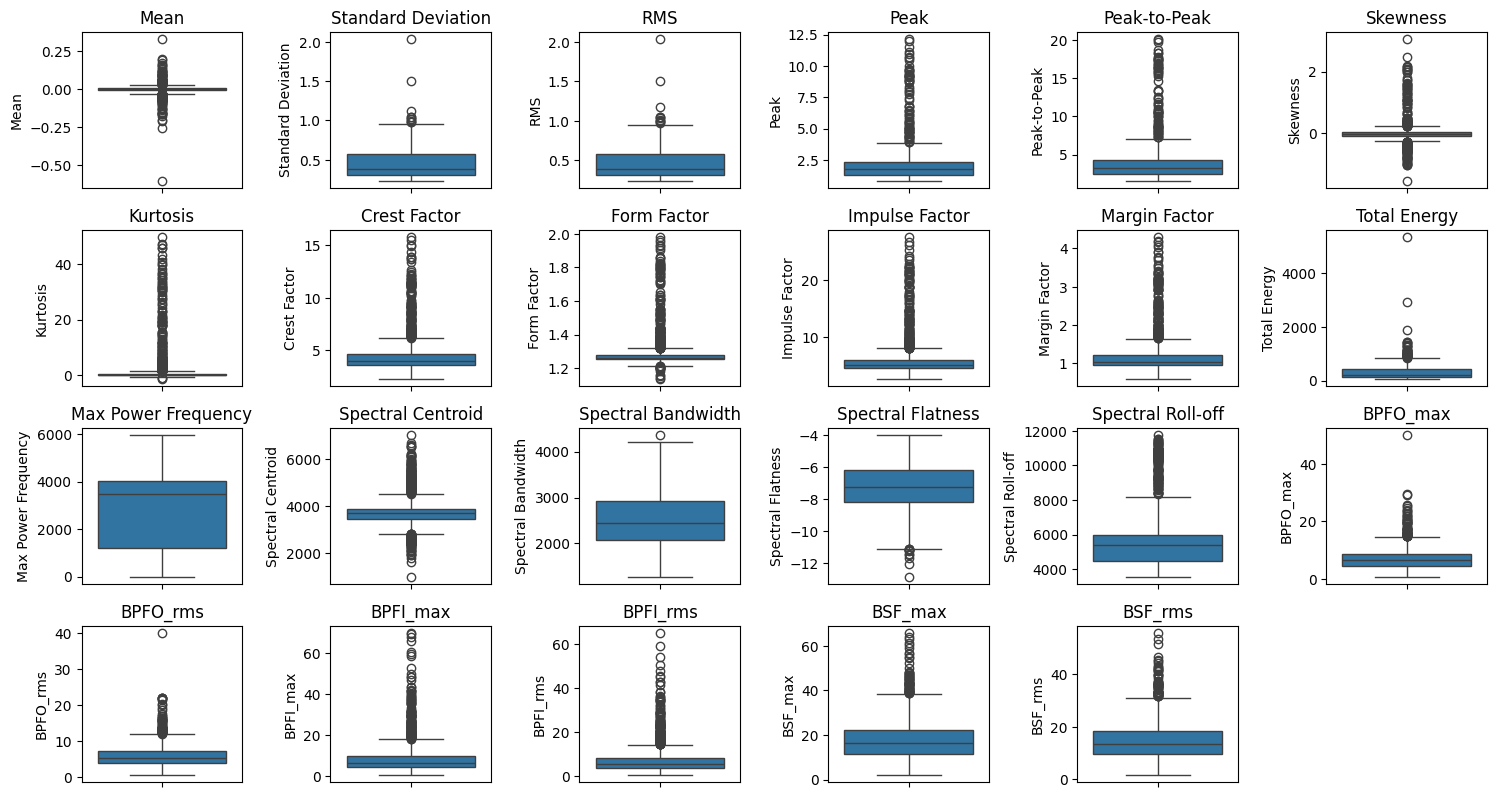

(1470, 37)
(1470, 37)
Original shape of X: (1470, 23)
Shape of X after outlier removal: (823, 23)


In [14]:
# prompt: verifica outliyers en el eje X

import matplotlib.pyplot as plt
# Calculate IQR for each indicator
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (X < lower_bound) | (X > upper_bound)

# Print or visualize outliers (example: print the number of outliers for each indicator)
print("Number of outliers for each indicator:")
print(outliers.sum())

# Visualize outliers using box plots (one for each indicator)
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(5, 6, i+1)
    sns.boxplot(y=X[col])
    plt.title(col)
plt.tight_layout()
plt.show()
print(indicators.shape)

# Optionally, remove outliers from your dataset
X_cleaned = X[~outliers.any(axis=1)]
y_cleaned = Y[~outliers.any(axis=1)]
print(indicators.shape)

print(f"Original shape of X: {X.shape}")
print(f"Shape of X after outlier removal: {X_cleaned.shape}")


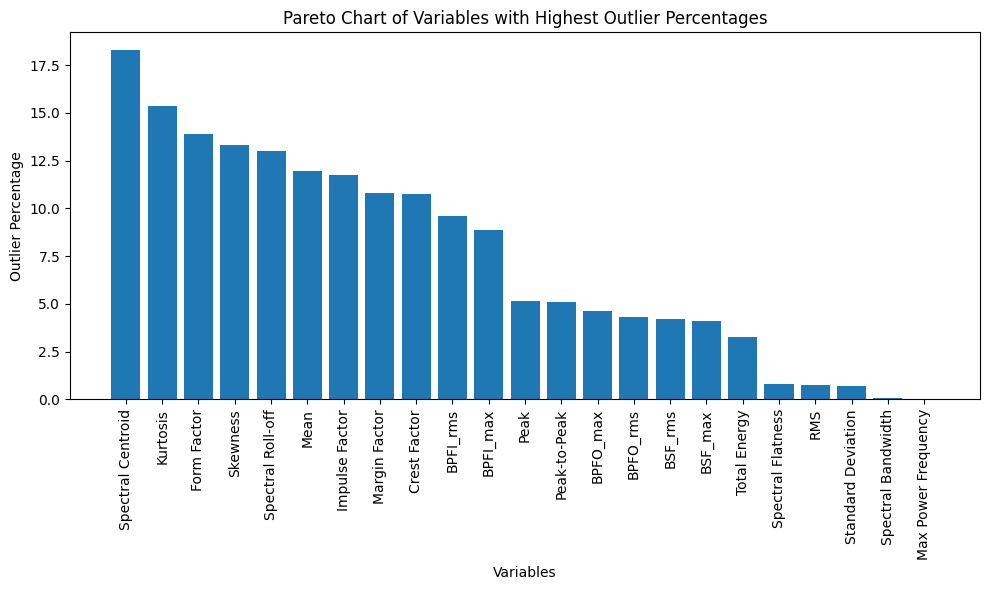

In [15]:
# prompt: diagrama pareto variables con el mayor porcentaje de oultayers

import matplotlib.pyplot as plt
# Calculate the percentage of outliers for each variable
outlier_percentages = (outliers.sum() / len(X)) * 100

# Sort variables by outlier percentage in descending order
sorted_outliers = outlier_percentages.sort_values(ascending=False)

# Create a Pareto chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_outliers.index, sorted_outliers.values)
plt.xlabel("Variables")
plt.ylabel("Outlier Percentage")
plt.title("Pareto Chart of Variables with Highest Outlier Percentages")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [16]:
# prompt: identificar las variables con mayor correlacion con RUL

# Calculate the correlation between all indicators and RUL
correlation_with_rul = indicators[actual_indicators].corrwith(indicators['RUL'])

# Sort the correlations in descending order to find the indicators with the highest correlation with RUL
sorted_correlation = correlation_with_rul.abs().sort_values(ascending=False)

# Print or visualize the sorted correlations
print("Correlation with RUL (absolute value, descending order):\n", sorted_correlation)


Correlation with RUL (absolute value, descending order):
 Spectral Flatness      0.539156
Spectral Bandwidth     0.392222
Peak-to-Peak           0.337396
Spectral Roll-off      0.327258
Peak                   0.325487
Standard Deviation     0.318635
RMS                    0.315521
Form Factor            0.255841
Total Energy           0.209804
Impulse Factor         0.204532
Kurtosis               0.197106
Margin Factor          0.190457
Crest Factor           0.187681
Spectral Centroid      0.176302
BSF_rms                0.175562
BSF_max                0.168384
BPFO_rms               0.157804
BPFO_max               0.153494
Max Power Frequency    0.120635
BPFI_rms               0.094771
BPFI_max               0.090388
Skewness               0.056108
Mean                   0.002700
dtype: float64


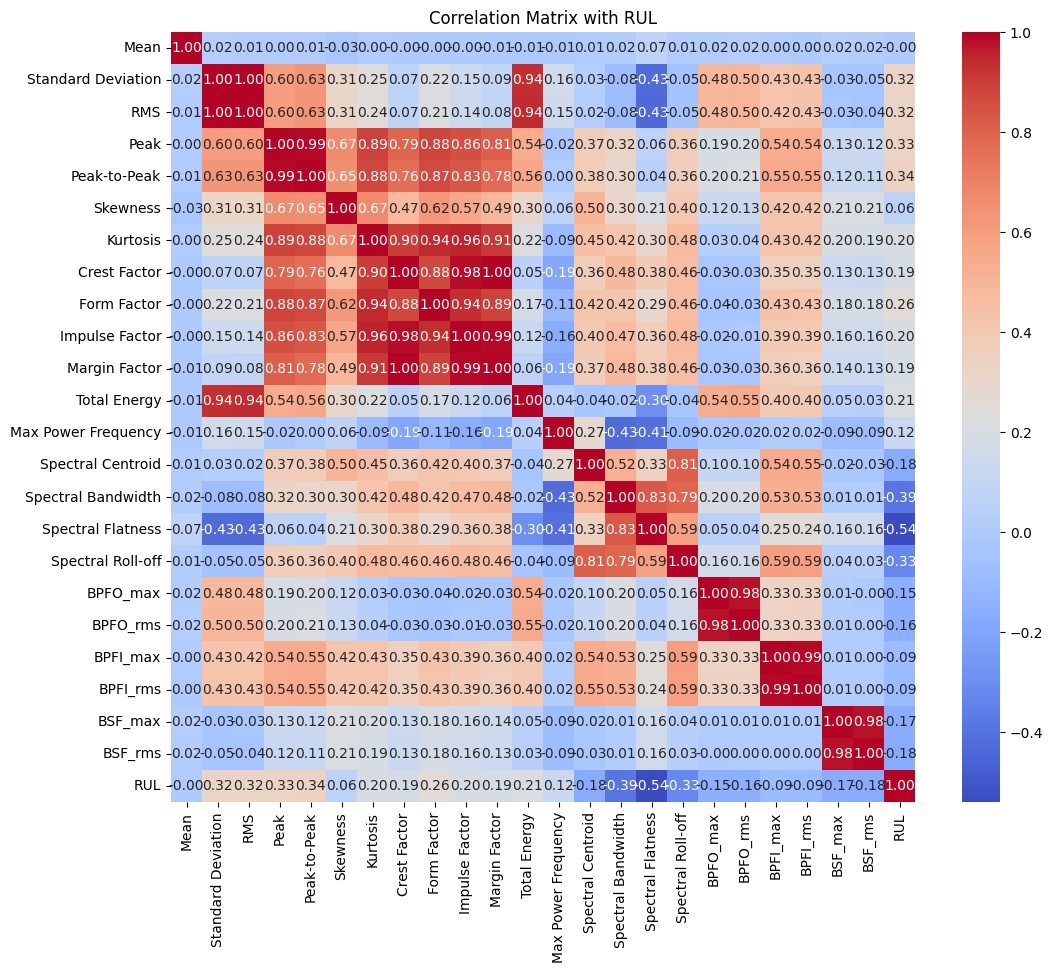

In [17]:
# prompt: visualizar mapa de correlación respecto a RUL

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = indicators[actual_indicators + ['RUL']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with RUL')
plt.show()


In [18]:
# prompt: crear una tabla con los valores de correlación y %de outlayers

import pandas as pd
# Create a DataFrame to store the correlation and outlier percentage
correlation_outlier_df = pd.DataFrame(index=actual_indicators)

# Calculate the correlation with RUL
correlation_outlier_df['Correlation with RUL'] = indicators[actual_indicators].corrwith(indicators['RUL'])

# Calculate the percentage of outliers for each indicator
outlier_percentages = (outliers.sum() / len(indicators)) * 100
correlation_outlier_df['Outlier Percentage'] = outlier_percentages

# Display the table
correlation_outlier_df


,Correlation with RUL,Outlier Percentage
Mean,-0.002700,11.972789
Standard Deviation,0.318635,0.680272
RMS,0.315521,0.748299
Peak,0.325487,5.170068
Peak-to-Peak,0.337396,5.102041
Skewness,0.056108,13.333333
Kurtosis,0.197106,15.374150
Crest Factor,0.187681,10.748299
Form Factor,0.255841,13.877551
Impulse Factor,0.204532,11.768707


In [19]:
# prompt: cuales son 3 peores indicadores respecto a correlación y % de outlayers?

# Sort the DataFrame by outlier percentage and correlation (absolute value) in descending order
correlation_outlier_df_sorted = correlation_outlier_df.sort_values(by=['Outlier Percentage', 'Correlation with RUL'], ascending=[False, False])

# Get the top 3 worst indicators
worst_3_indicators = correlation_outlier_df_sorted.head(3)

print("3 peores indicadores (mayor % outliers y menor correlación absoluta con RUL):")
worst_3_indicators


3 peores indicadores (mayor % outliers y menor correlación absoluta con RUL):


,Correlation with RUL,Outlier Percentage
Spectral Centroid,-0.176302,18.299320
Kurtosis,0.197106,15.374150
Form Factor,0.255841,13.877551


In [20]:
# prompt: elimina de la dataset actual_indicator los peores indicadores

# Assuming 'actual_indicators' and 'indicators' DataFrame are defined from the previous code

# Remove the worst 3 indicators from the actual_indicators list
indicators_to_remove = worst_3_indicators.index.tolist()
actual_indicators_filtered = [indicator for indicator in actual_indicators if indicator not in indicators_to_remove]

# Recalculate X with the filtered indicators
X_filtered = indicators[actual_indicators_filtered]

# Print the updated list of indicators
print("Updated list of indicators after removing worst 3:")
print(actual_indicators_filtered)


# Continue with the rest of your code, using X_filtered instead of X
# For example, in the train_test_split:
X_train, X_test, y_train, Y_test = train_test_split(X_filtered, Y, test_size=0.2, random_state=42)

# ...and so on in the rest of your model training and evaluation code.


Updated list of indicators after removing worst 3:
['Mean', 'Standard Deviation', 'RMS', 'Peak', 'Peak-to-Peak', 'Skewness', 'Crest Factor', 'Impulse Factor', 'Margin Factor', 'Total Energy', 'Max Power Frequency', 'Spectral Bandwidth', 'Spectral Flatness', 'Spectral Roll-off', 'BPFO_max', 'BPFO_rms', 'BPFI_max', 'BPFI_rms', 'BSF_max', 'BSF_rms']


In [21]:
# prompt: importar modelo

import numpy as np
# Initialize the model
model_filtered = LinearRegression()

# Fit the model to the training data
model_filtered.fit(X_train, y_train)

# Check the score of the model on the test data
score_filtered = model_filtered.score(X_test, Y_test)
print(f"Model R^2 score on the test set (filtered indicators): {score_filtered}")

# Make predictions
y_pred_filtered = model_filtered.predict(X_test)


# ... rest of your model evaluation code using y_pred_filtered
mae_filtered = mean_absolute_error(Y_test, y_pred_filtered)
mse_filtered = mean_squared_error(Y_test, y_pred_filtered)
rmse_filtered = np.sqrt(mse_filtered)

print(f"Mean Absolute Error (MAE) - filtered: {mae_filtered}")
print(f"Mean Squared Error (MSE) - filtered: {mse_filtered}")
print(f"Root Mean Squared Error (RMSE) - filtered: {rmse_filtered}")


Model R^2 score on the test set (filtered indicators): 0.11734647470000115
Mean Absolute Error (MAE) - filtered: 1230.6042037826696
Mean Squared Error (MSE) - filtered: 4096581.6194922714
Root Mean Squared Error (RMSE) - filtered: 2024.0013882140179
